<h1>Time Series</h1>

<h2>The objective of this notebook is: </h2>
<ol>
<li>In the first part: understand Time series forecasting with ARIMA model in python, and fine tune the hyper-parameters to get the least possible error.</li>
<li> In the second part: Apply CNN from scratch to the same dataset.</li>
<li> Apply Facebook prophet to the same dataset.</li>
</ol>

<h2>The dataset</h2>

Build a model to forecast the demand (passenger traffic) in Airplanes.<br> 
The data is classified in date/time and the passengers travelling per month

<h2>What is Time series analysis?</h2>

A. Time Series is a series of observations taken at specified time intervals usually equal intervals. <br>
 

<h2>We don't need to apply Time series in atleast the following 2 cases:</h2>
<ul>
<li> 
a) The dependant variable(y) (that is supposed to vary with time) is constant.<br>
    Eq: y=f(x)=4, a line parallel to x-axis(time) will always remain the same.</li> 
<li> b) The dependant variable(y) represent values that can be denoted as a mathematical function.<br> Eq: sin(x), log(x), Polynomials etc. Thus, we can directly get value at some time using the function itself. No need of forecasting.</li> 
    </ul>

<h2>There are 4 componentsof Time Series:</h2>
<ul>
<li>
a) Trend - Upward & downward movement of the data with time over a large period of time. Eq: Appreciation of Dollar vs rupee.</li>
<li>b) Seasonality - seasonal variances. Eq: Ice cream sales increases in Summer only</li>
<li>c) Noise or Irregularity - Spikes & troughs at random intervals</li>
<li>d) Cyclicity - behavior that repeats itself after large interval of time, like months, years etc.</li>
</ul>

<h2>Why does Time Series(TS) need to be stationary?</h2>
<h3>It is because of the following reasons:</h3>
<ul>
<li>a) If a TS has a particular behavior over a time interval, then there's a high probability that over a different interval, it will have same behavior, provided TS is stationary. This helps in forecasting accurately.</li>
<li>b) Theories & Mathematical formulas ae more mature & easier to apply for as TS which is stationary.</li>
</ul>

<h2>Tests to check if a series is stationary or not</h2>
<h3> There are 2 ways to check for Stationarity of a TS:</h3>
<ul>
 <li>a) Rolling Statistics - Plot the moving avg or moving standard deviation to see if it varies with time. Its a visual technique.</li>
<li>b) ADCF Test - Augmented Dickey–Fuller test is used to gives us various values that can help in identifying stationarity. The Null hypothesis says that a TS is non-stationary. It comprises of a Test Statistics & some critical values for some confidence levels. If the Test statistics is less than the critical values, we can reject the null hypothesis & say that the series is stationary. THE ADCF test also gives us a p-value. Acc to the null hypothesis, lower values of p is better.</li>
     </ul>

<h1> Time Searis usinf LSTM</h1>

## 1- Load the data

### Importing all the required libraries for analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import itertools
import numpy as np
import random
from statsmodels.tsa.stattools import adfuller

import statsmodels.api as sm
# prophet by Facebook
# from fbprophet import Prophet
# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

### Reading the dataset 
 Creating the 'Date' as Index for data and viewing the dataset

In [2]:
path = "../Data/AirPassengers.csv" 
df = pd.read_csv(path,parse_dates=[0])

## 2- Preprocessing

### convert from string to datetime

In [3]:
df['Month'] = pd.to_datetime(df['Month'],infer_datetime_format=True)
df = df.set_index(['Month'])
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Visualizing the Time Series plot for the number of Air Passengers

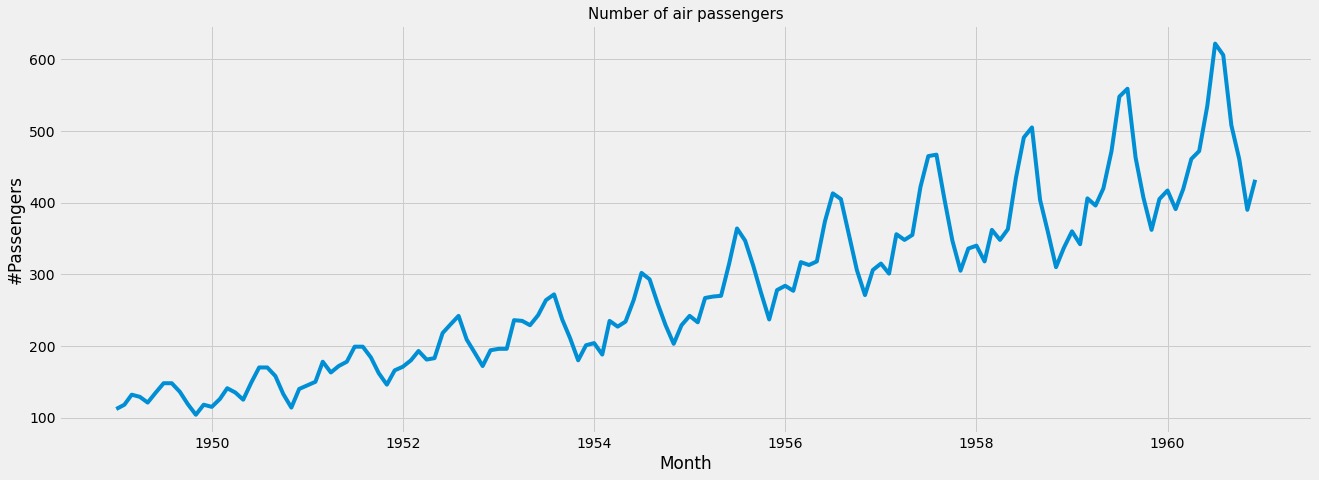

In [4]:
## Plot the Time series data
fig, ax = plt.subplots(figsize=(20,7))
a = sns.lineplot(x="Month", y="#Passengers", data=df)
a.set_title("Number of air passengers",fontsize=15)
plt.show()

<h2>Scaling the Data</h2>

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. <br>
You want to scale data when you're using methods based on measures of how far apart data points, like support vector machines, or SVM or k-nearest neighbors, or KNN.

<h2>Do I have to scale/normalize my training data for LSTM Classification, even if I only have one feature?</h2>

It's still advisable to do so because your randomly initialised weights may not be able to get along with feature scale very well, and may cause the activations to saturate.

In [5]:
#data_Scaling
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df)

In [6]:
df

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

## Creating train and test partition


In [11]:
#Creating train and test partition
train = int(len(df)*0.75)
test = len(df)-train



train_data,test_data=df[0:train,:],df[train:len(df),:1]

## Converting an array of values into a dataset matrix


In [12]:
# converting an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

y_train

array([0.03281853, 0.05984556, 0.08494208, 0.08494208, 0.06177606,
       0.02895753, 0.        , 0.02702703, 0.02123552, 0.04247104,
       0.07142857, 0.05984556, 0.04054054, 0.08687259, 0.12741313,
       0.12741313, 0.1042471 , 0.05598456, 0.01930502, 0.06949807,
       0.07915058, 0.08880309, 0.14285714, 0.11389961, 0.13127413,
       0.14285714, 0.18339768, 0.18339768, 0.15444015, 0.11196911,
       0.08108108, 0.11969112, 0.12934363, 0.14671815, 0.17181467,
       0.14864865, 0.15250965, 0.22007722, 0.24324324, 0.26640927,
       0.2027027 , 0.16795367, 0.13127413, 0.17374517, 0.17760618,
       0.17760618, 0.25482625, 0.25289575, 0.24131274, 0.26833977,
       0.30888031, 0.32432432, 0.25675676, 0.20656371, 0.14671815,
       0.18725869, 0.19305019, 0.16216216, 0.25289575, 0.23745174,
       0.25096525, 0.30888031, 0.38223938, 0.36486486, 0.2992278 ,
       0.24131274, 0.19111969, 0.24131274, 0.26640927, 0.24903475,
       0.31467181, 0.31853282, 0.32046332, 0.40733591, 0.50193

In [14]:
X_train.shape, y_train.shape


((103, 4), (103,))

In [15]:
# reshape input to be [sample, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)

X_train.shape

(103, 4, 1)

In [16]:
# !pip install numpy==1.19.5


In [17]:
### Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose=1)

Epoch 1/100
103/103 [==============================] - 8s 21ms/step - loss: 0.0163 - val_loss: 0.0347
Epoch 2/100
103/103 [==============================] - 1s 7ms/step - loss: 0.0103 - val_loss: 0.0306
Epoch 3/100
103/103 [==============================] - 1s 5ms/step - loss: 0.0076 - val_loss: 0.0326
Epoch 4/100
103/103 [==============================] - 1s 5ms/step - loss: 0.0091 - val_loss: 0.0309
Epoch 5/100
103/103 [==============================] - 1s 6ms/step - loss: 0.0079 - val_loss: 0.0263
Epoch 6/100
103/103 [==============================] - 1s 7ms/step - loss: 0.0068 - val_loss: 0.0260
Epoch 7/100
103/103 [==============================] - 1s 5ms/step - loss: 0.0070 - val_loss: 0.0318
Epoch 8/100
103/103 [==============================] - 1s 5ms/step - loss: 0.0061 - val_loss: 0.0259
Epoch 9/100
103/103 [==============================] - 1s 5ms/step - loss: 0.0069 - val_loss: 0.0255
Epoch 10/100
103/103 [==============================] - 1s 6ms/step - loss: 0.0063 - val_l

103/103 [==============================] - 1s 5ms/step - loss: 0.0021 - val_loss: 0.0199
Epoch 82/100
103/103 [==============================] - 1s 5ms/step - loss: 0.0021 - val_loss: 0.0081
Epoch 83/100
103/103 [==============================] - 1s 5ms/step - loss: 0.0021 - val_loss: 0.0096
Epoch 84/100
103/103 [==============================] - 1s 5ms/step - loss: 0.0021 - val_loss: 0.0108
Epoch 85/100
103/103 [==============================] - 1s 5ms/step - loss: 0.0022 - val_loss: 0.0126
Epoch 86/100
103/103 [==============================] - 1s 5ms/step - loss: 0.0023 - val_loss: 0.0070
Epoch 87/100
103/103 [==============================] - 1s 6ms/step - loss: 0.0023 - val_loss: 0.0116
Epoch 88/100
103/103 [==============================] - 1s 5ms/step - loss: 0.0021 - val_loss: 0.0089
Epoch 89/100
103/103 [==============================] - 1s 5ms/step - loss: 0.0023 - val_loss: 0.0081
Epoch 90/100
103/103 [==============================] - 1s 5ms/step - loss: 0.0024 - val_loss: 

In [18]:
#Model Prediction
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

test_predict

array([[0.4070034 ],
       [0.519735  ],
       [0.6940853 ],
       [0.71197647],
       [0.6634201 ],
       [0.32341808],
       [0.48284644],
       [0.33441317],
       [0.49173644],
       [0.4853832 ],
       [0.41410682],
       [0.65865475],
       [0.45864195],
       [0.6323299 ],
       [0.70634514],
       [0.8411617 ],
       [0.65684456],
       [0.39483145],
       [0.51821834],
       [0.40695226],
       [0.6275527 ],
       [0.5319257 ],
       [0.47597757],
       [0.631723  ],
       [0.6624207 ],
       [0.61342186],
       [0.846665  ],
       [0.9093832 ],
       [0.57932556],
       [0.46864566],
       [0.5749304 ]], dtype=float32)

In [19]:
#Transforming data back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

test_predict

array([[314.8278 ],
       [373.22272],
       [463.5362 ],
       [472.80383],
       [447.6516 ],
       [271.53058],
       [354.11447],
       [277.22604],
       [358.71948],
       [355.42853],
       [318.50732],
       [445.18317],
       [341.57654],
       [431.5469 ],
       [469.8868 ],
       [539.72174],
       [444.24548],
       [308.52267],
       [372.4371 ],
       [314.80127],
       [429.0723 ],
       [379.5375 ],
       [350.55637],
       [431.2325 ],
       [447.13394],
       [421.75253],
       [542.57245],
       [575.0605 ],
       [404.09064],
       [346.75845],
       [401.81396]], dtype=float32)

In [22]:
## Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
import math

math.sqrt(mean_squared_error(y_train,train_predict))

245.54212075888154

In [23]:
452.56696011597353
### Plotting 
# shift train predictions for plotting
look_back=4
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict
# plot baseline and predictions
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.title("Passengers Travelled")
plt.plot(scaler.inverse_transform(data)) #original data
plt.plot(testPredictPlot) #test prediction
plt.show()

NameError: name 'data' is not defined